In [55]:
# %load_ext autoreload
# %reload_ext autoreload
# %autoreload 2

In [56]:
import os
os.chdir('C:\\Users\\WDG1DCR\\Desktop\\my_projects\\data_analysis\\data_cleanse')
# os.chdir('C:\\Users\\gratten\\Documents\\python\\projects\\data_cleanse')

import pandas as pd
from prep import filter
from prep import sort
from plot import bar
from utility import generate

In [57]:
fileName = 'filelist_8_10'
df_og = pd.read_csv('datasets/' + fileName + '.csv', sep=';')

In [58]:
df = filter.sld(df_og)

In [59]:
dups = df[df.duplicated(['name_low'], keep=False)]
dups = dups.sort_values(['name_low'])

In [60]:
# dups = dups.reset_index()
dups.reset_index(inplace=True, drop=True)

In [61]:
dups.head()

,Name,Format,size,modified,created,path,name_low
0,#40 CHAIN.SLDASM,SLDASM,"98,273",10/12/2018 13:43:23,02/22/2016 01:04:05,R:\Doc\SolidWorks\SolidWorks Palette\Palette P...,#40 chain.sldasm
1,#40 Chain.SLDASM,SLDASM,"92,370",06/19/2020 16:04:50,02/21/2016 22:51:10,R:\Doc\SolidWorks\CONVEYOR,#40 chain.sldasm
2,#40 PIN RIVETED.SLDPRT,SLDPRT,"55,996",02/24/2017 15:31:59,02/22/2016 01:04:05,R:\Doc\SolidWorks\SolidWorks Palette\Palette P...,#40 pin riveted.sldprt
3,#40 PIN RIVETED.SLDPRT,SLDPRT,"52,842",11/20/2014 10:11:00,02/21/2016 23:05:11,R:\Doc\SolidWorks\HS4989 - QUAKER MAID MEATS,#40 pin riveted.sldprt
4,#40 PIN RIVETEDRev2.SLDPRT,SLDPRT,"52,722",11/19/2014 22:34:28,02/21/2016 22:59:28,R:\Doc\SolidWorks\HS4836-4 TWO FLAP CLOSER (ME...,#40 pin rivetedrev2.sldprt


In [62]:
top_offenders = dups['path'].value_counts().index.to_list()

In [63]:
# input: data (trimmed dups), num, cut off indicator (ie valCounts > 5)
# output: top_offenders list at level 2, in reguards to top_offender[num]
def get_top_offenders(dups, num, limit):
    
    # list of all files in directory top_offender[num]
    file_list = []
    for i in range(len(dups['path'])):
        if dups['path'][i] == top_offenders[num]:
            file_list.append(dups['name_low'].iloc[i])
    
    # dictionary of all files in directory top_offender[num] and all other associated paths
    # {filename: [path1, path2, etc], filename: [path1, path2, etc]}
    file_paths = {}
    for file in file_list:
        dups_trimmed = dups[(dups['name_low'] == file)]
        path_list = []
        for path in dups_trimmed['path']:
            path_list.append(path)
        file_paths[file] = path_list
        
    # create a list of all paths involved, merged together
    partner_paths = []
    for k, v in file_paths.items():
        for i in v:
            if i != top_offenders[num]:
                partner_paths.append(i)
    
    # create series and use value_counts
    partner_paths_series = pd.Series(partner_paths)
    val_count = partner_paths_series.value_counts()
    
    # trim top_offenders2 list, per user input (> x associated paths)
    top_offenders2 = []
    for i in range(len(val_count)):
        if val_count[i] > limit:
            top_offenders2.append(val_count.index[i])
    
    return top_offenders2, file_paths

In [64]:
def build_data(offender, file_paths):
    
    # trim file_paths to only relevent files
    file_paths_trimmed = {}
    for k, v in file_paths.items():
        if offender in v:
            file_paths_trimmed[k] = v
            
    totalFiles = len(file_paths_trimmed.keys())
            
    occur_list = []
    for k, v in file_paths_trimmed.items():
        if len(v) not in occur_list:
                occur_list.append(len(v))

    occur_dict = {}
    for i in occur_list:
        occur_dict[i] = 0
        for v in file_paths_trimmed.values():
            if i == len(v):
                occur_dict[i] += 1
                
    num_list = []
    occur_list = []
    for i in range(len(occur_dict)):
        key = min(occur_dict.keys())
        num_list.append(key)
        value = occur_dict.pop(key)
        occur_list.append(value) 
            
    return num_list, occur_list, totalFiles

In [65]:
def chart_em(num_list, occur_list, totalFiles, titleA, titleB, i):
    
    df = pd.DataFrame({'other paths':num_list, 'occurences':occur_list})
    title = f'{titleA}\n{titleB}\nTotal Files: {totalFiles}\nChart: {i}'
    ax = df.plot.bar(x='other paths', y='occurences', rot=0, figsize=(10, 4), title = title)

In [66]:
def build_data2(num, chart_num, top_offenders, top_offenders2, file_paths):
    titleA = top_offenders[num]
    titleB = top_offenders2[chart_num]
    
    file_paths_trimmed = {}
    for k, v in file_paths.items():
        if titleB in v:
            if len(v) == quant: 
                file_paths_trimmed[k] = v
                
    path_list = []
    for v in file_paths_trimmed.values():
        for i in v:
            path_list.append(i)
            
    path_list = pd.Series(path_list)
    
    occurence_list = path_list.value_counts().to_list()
    
    path_list = path_list.value_counts().index.to_list()
    
    return occurence_list, path_list, file_paths_trimmed

In [67]:
def chart_em2(list1, list2, titleA):
    df = pd.DataFrame({'other paths':list1, 'occurences':list2})
    title = f'{titleA}'
    ax = df.plot.barh(x='other paths', y='occurences', rot=0, figsize=(3, 7), title = title)

In [68]:
############################################
# choose top offender
############################################
num = 0
limit = 20

titleA = top_offenders[num]

top_offenders2, file_paths = get_top_offenders(dups, num, limit)

In [69]:
numlist_list = []
occurlist_list =[]
totalFiles_list = []
for i in top_offenders2:
    numlist, occurlist, totalFiles = build_data(i, file_paths)
    numlist_list.append(numlist)
    occurlist_list.append(occurlist)
    totalFiles_list.append(totalFiles)

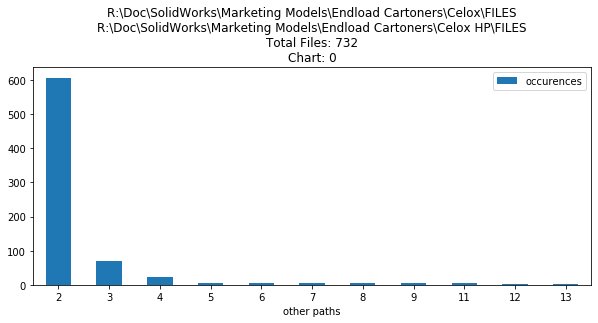

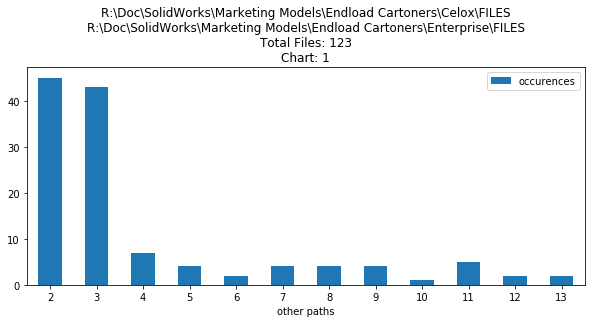

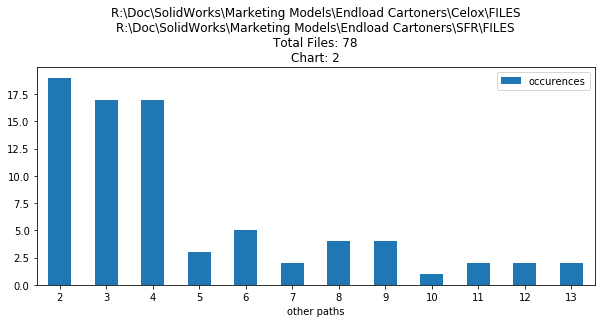

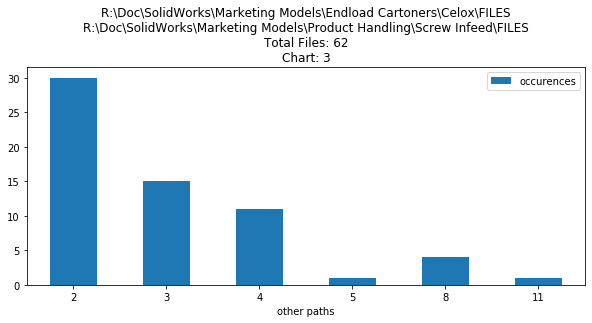

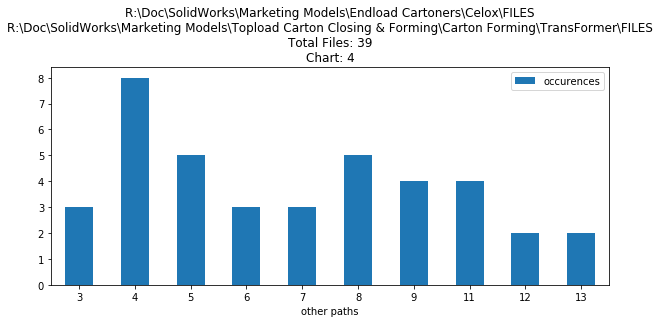

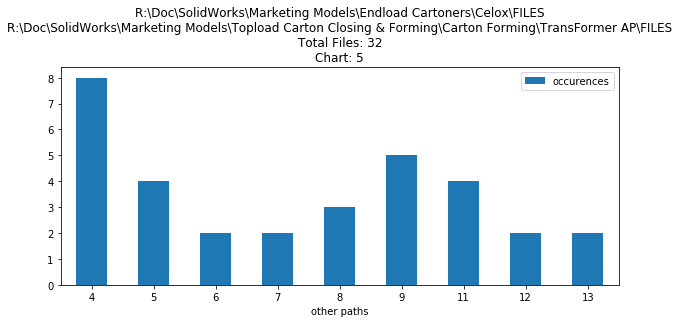

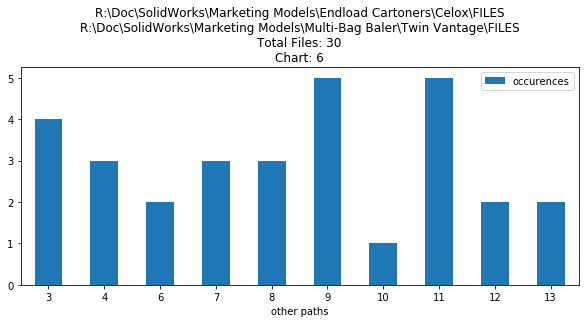

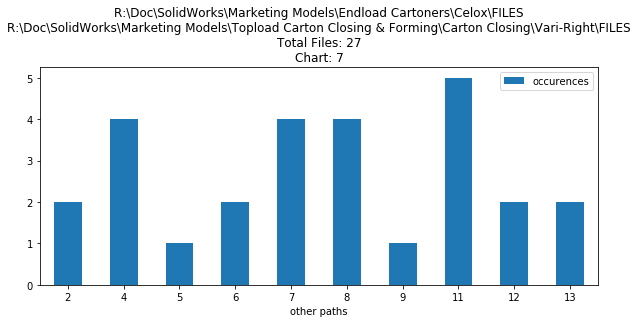

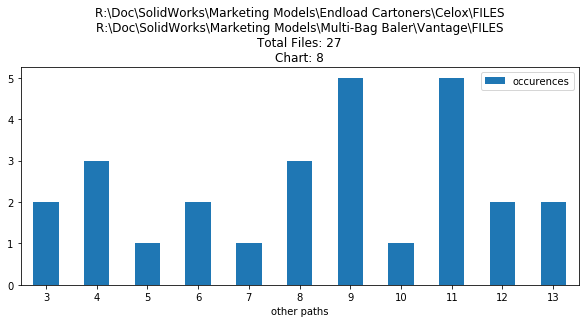

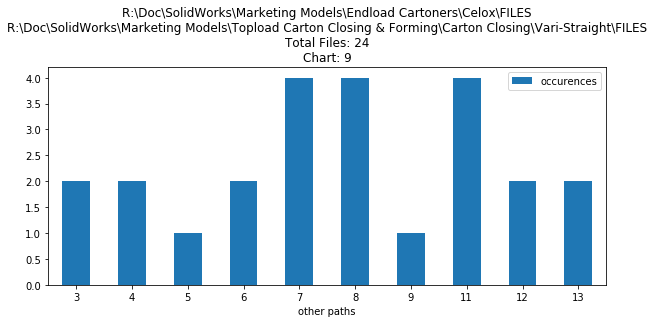

In [70]:
for i in range(len(numlist_list)):
    titleB = top_offenders2[i]
    chart_em(numlist_list[i], occurlist_list[i], totalFiles_list[i], titleA, titleB, i)

In [71]:
############################################
# choose chart num and column for file list
############################################
chart_num = 0
quant = 3

In [72]:
occurence_list, path_list, file_paths_trimmed = build_data2(num, chart_num, top_offenders, top_offenders2, file_paths)

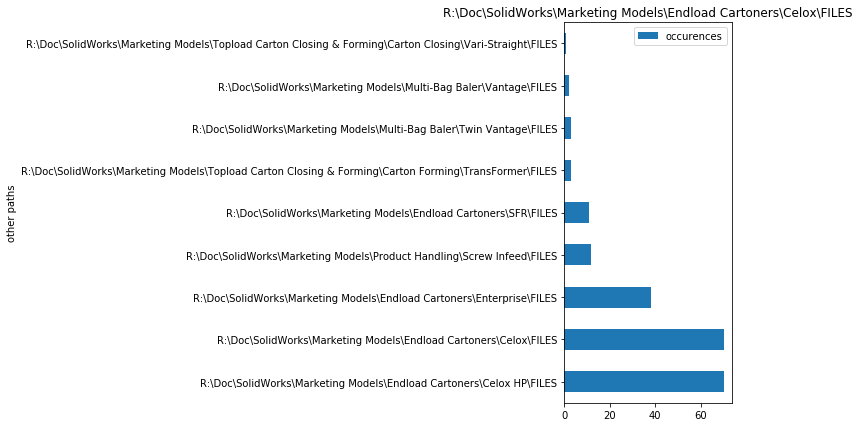

In [73]:
chart_em2(path_list, occurence_list, titleA)

In [74]:
for i in path_list:
    print(i)

R:\Doc\SolidWorks\Marketing Models\Endload Cartoners\Celox HP\FILES
R:\Doc\SolidWorks\Marketing Models\Endload Cartoners\Celox\FILES
R:\Doc\SolidWorks\Marketing Models\Endload Cartoners\Enterprise\FILES
R:\Doc\SolidWorks\Marketing Models\Product Handling\Screw Infeed\FILES
R:\Doc\SolidWorks\Marketing Models\Endload Cartoners\SFR\FILES
R:\Doc\SolidWorks\Marketing Models\Topload Carton Closing & Forming\Carton Forming\TransFormer\FILES
R:\Doc\SolidWorks\Marketing Models\Multi-Bag Baler\Twin Vantage\FILES
R:\Doc\SolidWorks\Marketing Models\Multi-Bag Baler\Vantage\FILES
R:\Doc\SolidWorks\Marketing Models\Topload Carton Closing & Forming\Carton Closing\Vari-Straight\FILES


In [75]:
file_list = []
for k in file_paths_trimmed.keys():
    file_list.append(k)

In [76]:
dups_trimmed = dups[dups['name_low'].isin(file_list)]

In [77]:
for i in range(len(dups_trimmed['size'])):    
    value1 = dups_trimmed['size'].iloc[i]
    value1 = value1.replace(',','')
    value1 = int(value1)
    dups_trimmed['size'].iloc[i] = value1

C:\Users\WDG1DCR\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [78]:
dups_trimmed = dups_trimmed.sort_values(by=['size'], ascending=False)

In [79]:
dups_trimmed.reset_index(inplace=True, drop=True)

In [80]:
dups_trimmed.head(25)

,Name,Format,size,modified,created,path,name_low
0,KWM-129522 SNR BAN QS18VP6FF50Q8.SLDPRT,SLDPRT,1454393,12/05/2012 08:49:42,02/21/2016 20:51:49,R:\Doc\SolidWorks\Marketing Models\Endload Car...,kwm-129522 snr ban qs18vp6ff50q8.sldprt
1,KWM-129522 SNR BAN QS18VP6FF50Q8.SLDPRT,SLDPRT,1454388,05/09/2011 14:37:00,02/21/2016 20:50:08,R:\Doc\SolidWorks\Marketing Models\Endload Car...,kwm-129522 snr ban qs18vp6ff50q8.sldprt
2,KWM-129522 SNR BAN QS18VP6FF50Q8.SLDPRT,SLDPRT,1453961,05/09/2011 14:37:00,02/21/2016 21:02:42,R:\Doc\SolidWorks\Marketing Models\Topload Car...,kwm-129522 snr ban qs18vp6ff50q8.sldprt
3,KWM-4176-361-000.SLDASM,SLDASM,782294,02/17/2012 09:27:34,02/21/2016 20:52:01,R:\Doc\SolidWorks\Marketing Models\Endload Car...,kwm-4176-361-000.sldasm
4,KWM-4176-361-000.SLDASM,SLDASM,666830,02/15/2012 17:24:01,02/21/2016 20:50:24,R:\Doc\SolidWorks\Marketing Models\Endload Car...,kwm-4176-361-000.sldasm
5,KWM-4176-361-000.SLDASM,SLDASM,664817,02/16/2012 08:55:55,02/21/2016 20:58:18,R:\Doc\SolidWorks\Marketing Models\Product Han...,kwm-4176-361-000.sldasm
6,KWM-112541 GMT ORM FPW690S-6.SLDPRT,SLDPRT,519879,09/21/2012 12:39:40,02/21/2016 20:52:45,R:\Doc\SolidWorks\Marketing Models\Endload Car...,kwm-112541 gmt orm fpw690s-6.sldprt
7,KWM-112541 GMT ORM FPW690S-6.SLDPRT,SLDPRT,518904,07/12/2011 16:04:37,02/21/2016 20:49:51,R:\Doc\SolidWorks\Marketing Models\Endload Car...,kwm-112541 gmt orm fpw690s-6.sldprt
8,KWM-112541 GMT ORM FPW690S-6.SLDPRT,SLDPRT,518124,12/05/2012 08:49:39,02/21/2016 20:51:16,R:\Doc\SolidWorks\Marketing Models\Endload Car...,kwm-112541 gmt orm fpw690s-6.sldprt
9,KWM-RHP C.R. Flange Brg Type PSF .SLDPRT,SLDPRT,312274,12/29/2010 09:19:55,02/21/2016 20:54:51,R:\Doc\SolidWorks\Marketing Models\Endload Car...,kwm-rhp c.r. flange brg type psf .sldprt


In [81]:
for i in dups_trimmed['Name']:
    print(i)

KWM-129522 SNR BAN QS18VP6FF50Q8.SLDPRT
KWM-129522 SNR BAN QS18VP6FF50Q8.SLDPRT
KWM-129522 SNR BAN QS18VP6FF50Q8.SLDPRT
KWM-4176-361-000.SLDASM
KWM-4176-361-000.SLDASM
KWM-4176-361-000.SLDASM
KWM-112541 GMT ORM FPW690S-6.SLDPRT
KWM-112541 GMT ORM FPW690S-6.SLDPRT
KWM-112541 GMT ORM FPW690S-6.SLDPRT
KWM-RHP C.R. Flange Brg Type PSF .SLDPRT
KWM-RHP C.R. Flange Brg Type PSF .SLDPRT
KWM-RHP C.R. Flange Brg Type PSF .SLDPRT
KWM-111290.SLDPRT
KWM-111290.SLDPRT
KWM-111290.SLDPRT
KWM-130559.SLDASM
KWM-ALLEN BRADLEY MPF.SLDPRT
KWM-ALLEN BRADLEY MPF.SLDPRT
KWM-ALLEN BRADLEY MPF.SLDPRT
KWM-DEEP GROOVE BALL - SINGLE ROW (AGILE).SLDPRT
KWM-128565.SLDPRT
KWM-128565.SLDPRT
KWM-128565.SLDPRT
KWM-DEEP GROOVE BALL - SINGLE ROW (AGILE).SLDPRT
KWM-105012 CDT HOF F66W36SS.SLDPRT
KWM-105012 CDT HOF F66W36SS.SLDPRT
KWM-105012 CDT HOF F66W36SS.SLDPRT
KWM-Schmersal BNS16 Switch.sldprt
KWM-Schmersal BNS16 Switch.sldprt
KWM-Schmersal BNS16 Switch.sldprt
KWM-119929 KNB MCM 6540T71.SLDPRT
KWM-119929 KNB MCM 6540T7